I have gone through your code and see a few things that I think may be problems. I have tried to point them out below.

In [1]:
# Import various packages
import pandas as pd
import sas7bdat as SAS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

/home/jfear/opt/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Plotting functions for easy plots
def msKDE(dat, header, ax, xlim=(-10, 10)):
    ax.axvline(0, color='r')
    ax.set_title(header)
    for name, grp in dat.groupby('mating_status'):
        grp[header].plot(kind='kde', label=name, ax=ax, xlim=xlim, legend=True)

In [3]:
# Import the SAS DataSet that you created
fname = '../../sas_data/cis_est_v11.sas7bdat'
sasDat = SAS.SAS7BDAT(fname)

dat = sasDat.to_data_frame()

dat.head()

,line,mating_status,fusion_id,q4_mean_theta,q5_mean_theta,q6_mean_theta,qsim_mean_theta,flag_q4_AI,flag_q5_AI,flag_q6_AI,...,allele_mean,c_i,T_t_1,T_i_1a,T_t_2,T_i_2a,T_t_3,T_i_3a,direction_cis,direction_trans
0,r324,M,F10005_SI,0.549,0.450,0.355,0.451,1,1,1,...,0.143359,0.037829,7.047314e-19,-0.089078,0.286717,-0.089078,-0.713283,-0.089078,+,-
1,r340,M,F10005_SI,0.323,0.241,0.177,0.243,1,1,1,...,0.143359,0.130490,7.047314e-19,-0.197672,0.286717,-0.197672,-0.713283,-0.197672,+,-
2,r357,M,F10005_SI,0.637,0.542,0.442,0.541,1,1,1,...,0.143359,-0.008630,7.047314e-19,-0.013469,0.286717,-0.013469,-0.713283,-0.013469,-,-
3,w38,M,F10005_SI,0.635,0.537,0.438,0.538,1,1,1,...,0.143359,-0.018613,7.047314e-19,0.184526,0.286717,0.184526,-0.713283,0.184526,-,+
4,w55,M,F10005_SI,0.843,0.784,0.709,0.784,1,1,1,...,0.143359,-0.141076,7.047314e-19,0.115692,0.286717,0.115692,-0.713283,0.115692,-,+


In [4]:
# Get a random set of 100 Fusion IDs for plotting
## Get list of all fusions
fusions = np.array(list(set(dat['fusion_id'].tolist())))

## Randomly select 100 fusions
np.random.seed(12345)
fus100 = np.random.choice(fusions, size=100, replace=False)
print(fus100)

[u'S2785_SI' u'S13382_SI' u'S37551_SI' u'F60648_SI' u'S15492_SI'
 u'F17370_SI' u'S19208_SI' u'S58615_SI' u'F2858_SI' u'F27994_SI'
 u'S62122_SI' u'F38789_SI' u'F16434_SI' u'S10193_SI' u'S14405_SI'
 u'S47305_SI' u'S43483_SI' u'S7504_SI' u'S21257_SI' u'F672_SI' u'S26953_SI'
 u'S24617_SI' u'S19952_SI' u'S22212_SI' u'F60361_SI' u'F21677_SI'
 u'F24497_SI' u'S42723_SI' u'S4203_SI' u'S17326_SI' u'F57851_SI'
 u'F26163_SI' u'S26384_SI' u'S45126_SI' u'S26777_SI' u'S23771_SI'
 u'S38089_SI' u'S13709_SI' u'S21937_SI' u'F10136_SI' u'S7063_SI'
 u'F26331_SI' u'S24709_SI' u'S18508_SI' u'F14369_SI' u'F37624_SI'
 u'F23767_SI' u'F16296_SI' u'F18926_SI' u'F12605_SI' u'S51694_SI'
 u'F47964_SI' u'S3326_SI' u'F36264_SI' u'S22494_SI' u'S58765_SI'
 u'S27193_SI' u'F19164_SI' u'S30112_SI' u'S23516_SI' u'F22521_SI'
 u'S16608_SI' u'S28200_SI' u'S15173_SI' u'F5116_SI' u'S25529_SI'
 u'S56997_SI' u'S37789_SI' u'F16605_SI' u'S60092_SI' u'S27163_SI'
 u'F1101_SI' u'F22497_SI' u'F32473_SI' u'S43495_SI' u'S25536_SI' u'F975_

In [5]:
# Filter dataset to only have 100 Fusions
dat100 = dat[dat['fusion_id'].isin(fus100)]
print(dat100.shape)
dat100.head(10)

(2108, 41)


,line,mating_status,fusion_id,q4_mean_theta,q5_mean_theta,q6_mean_theta,qsim_mean_theta,flag_q4_AI,flag_q5_AI,flag_q6_AI,...,allele_mean,c_i,T_t_1,T_i_1a,T_t_2,T_i_2a,T_t_3,T_i_3a,direction_cis,direction_trans
28,r101,M,F10136_SI,0.862,0.812,0.747,0.812,1,1,1,...,0.209585,-0.066147,7.914676e-18,-0.206929,0.419170,-0.206929,-0.580830,-0.206929,-,-
29,r324,M,F10136_SI,0.978,0.972,0.965,0.972,1,1,1,...,0.209585,-0.226537,7.914676e-18,0.042303,0.419170,0.042303,-0.580830,0.042303,-,+
30,r373,M,F10136_SI,0.544,0.442,0.347,0.442,1,1,1,...,0.209585,0.124838,7.914676e-18,-0.083999,0.419170,-0.083999,-0.580830,-0.083999,+,-
31,r491,M,F10136_SI,0.559,0.459,0.362,0.459,1,1,1,...,0.209585,0.109502,7.914676e-18,-0.050411,0.419170,-0.050411,-0.580830,-0.050411,+,-
32,r820,M,F10136_SI,0.636,0.540,0.440,0.540,1,1,1,...,0.209585,0.026337,7.914676e-18,0.034224,0.419170,0.034224,-0.580830,0.034224,+,+
33,r85,M,F10136_SI,0.407,0.316,0.237,0.317,1,1,1,...,0.209585,0.324054,7.914676e-18,-0.116152,0.419170,-0.116152,-0.580830,-0.116152,+,-
34,w38,M,F10136_SI,0.868,0.816,0.750,0.815,1,1,1,...,0.209585,-0.292047,7.914676e-18,0.380963,0.419170,0.380963,-0.580830,0.380963,-,+
35,r101,V,F10136_SI,0.753,0.673,0.580,0.673,1,1,1,...,0.123902,0.056491,0.000000e+00,-0.198411,0.247804,-0.198411,-0.752196,-0.198411,+,-
36,r324,V,F10136_SI,0.963,0.952,0.938,0.952,1,1,1,...,0.123902,-0.134649,0.000000e+00,0.037791,0.247804,0.037791,-0.752196,0.037791,-,+
37,r491,V,F10136_SI,0.551,0.451,0.355,0.451,1,1,1,...,0.123902,0.194483,0.000000e+00,-0.052267,0.247804,-0.052267,-0.752196,-0.052267,+,-


# Common Calculations to all methods


$C_t = \frac{\sum E_t - E_l}{n}$

$C_i= (E_l - E_t) + C_t$

## Distribution of cis-effects

I think these seem reasonable. In general I think I expect that both the cis-tester and cis-line should be normally distributed around 0. 

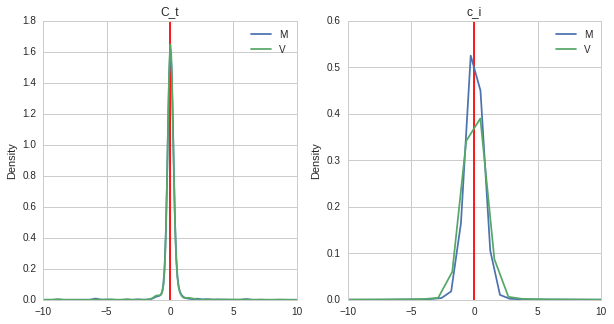

In [6]:
# Looking at all Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
msKDE(dat, 'C_t', ax1)
msKDE(dat, 'c_i', ax2)

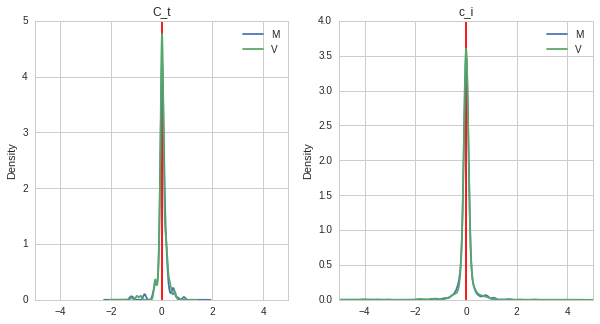

In [7]:
# Looking at 100 fusions only
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
msKDE(dat100, 'C_t', ax1, xlim=(-5, 5))
msKDE(dat100, 'c_i', ax2, xlim=(-5, 5))

### Distribution of Cis-tester effects by line

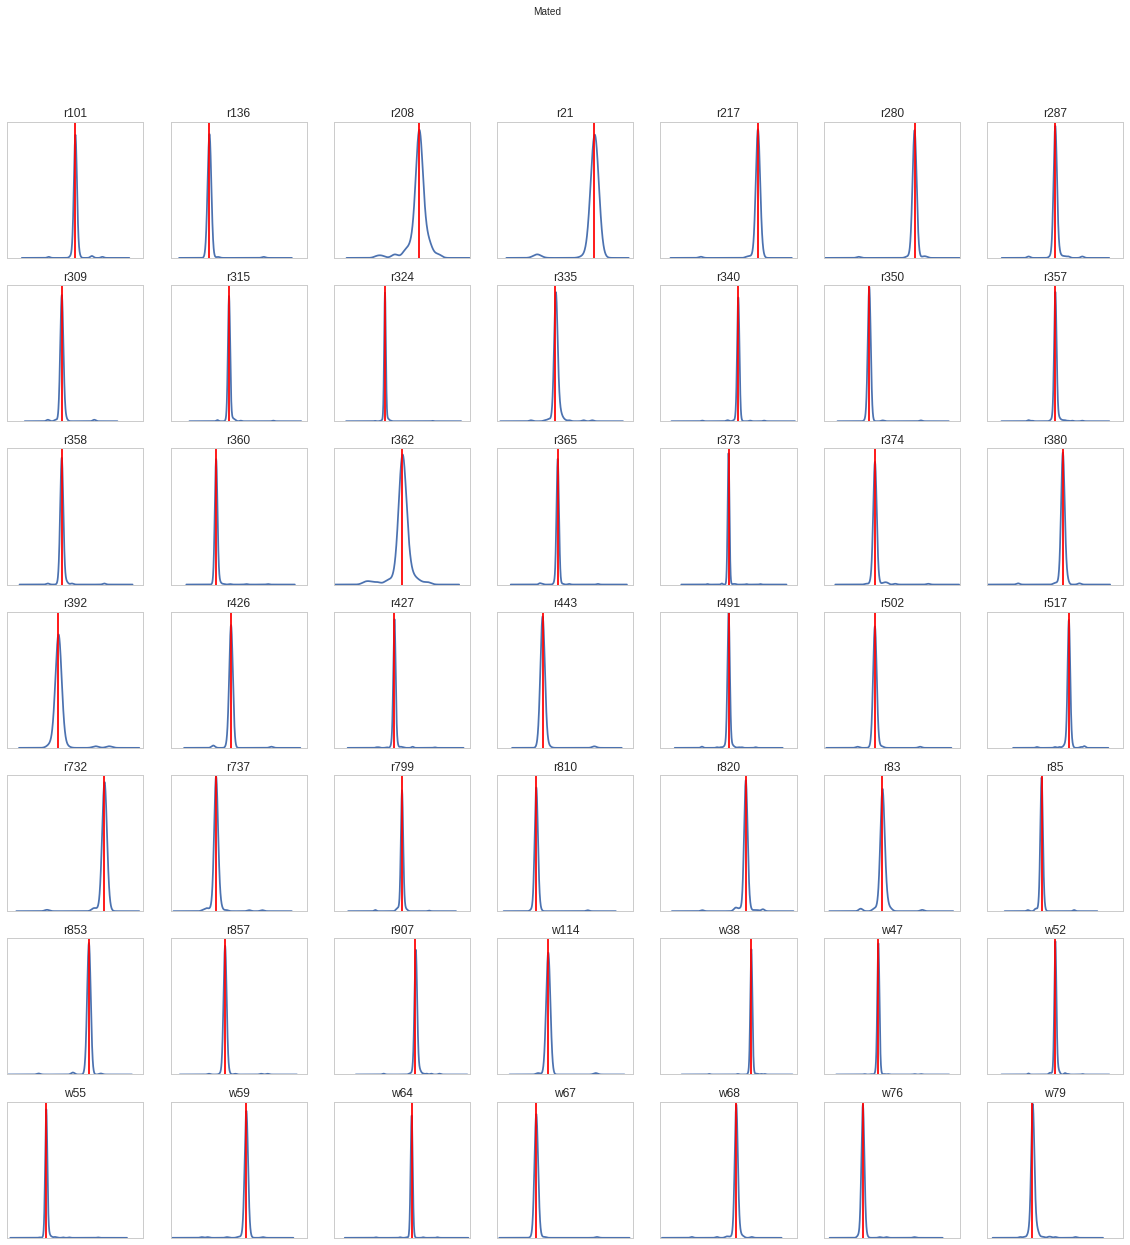

In [8]:
# Mated
groups = dat[dat['mating_status'] == 'M'].groupby('line')

fig, axes = plt.subplots(7, 7, figsize=(20, 20), sharey=False, sharex=False)
fig.suptitle('Mated')
axes = np.ravel(axes)

for i, (line, grp) in enumerate(groups):
    grp['C_t'].plot(kind='kde', ax=axes[i])
    axes[i].set_title(line)
    axes[i].axvline(0, color='r')
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

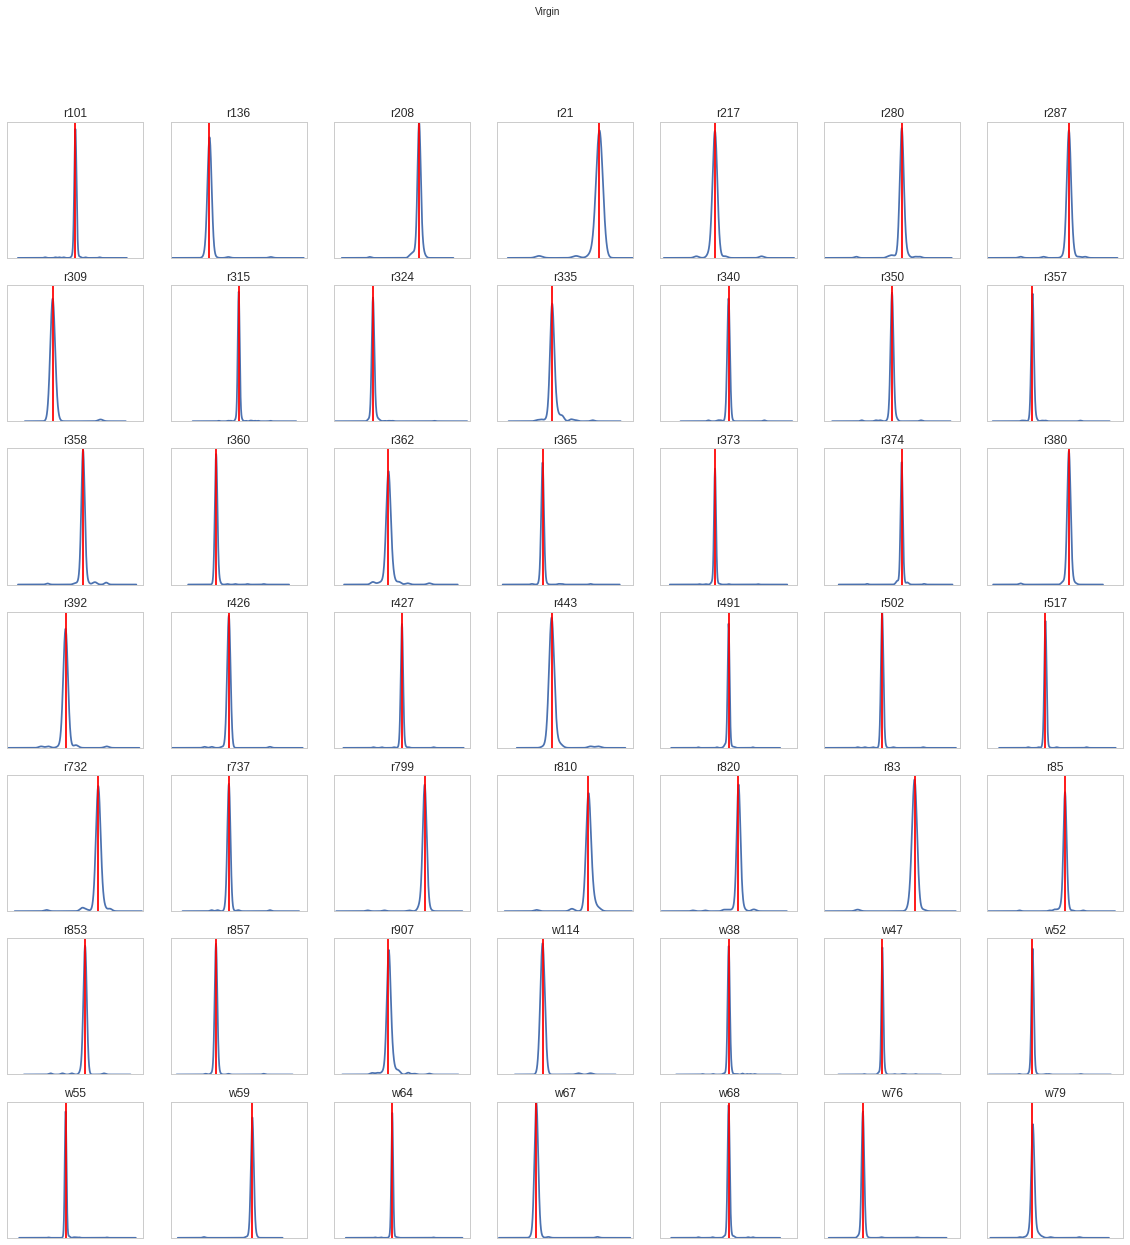

In [9]:
# Virgin
groups = dat[dat['mating_status'] == 'V'].groupby('line')

fig, axes = plt.subplots(7, 7, figsize=(20, 20), sharey=False, sharex=False)
fig.suptitle('Virgin')
axes = np.ravel(axes)

for i, (line, grp) in enumerate(groups):
    grp['C_t'].plot(kind='kde', ax=axes[i])
    axes[i].set_title(line)
    axes[i].axvline(0, color='r')
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## Comparison of $\theta_{q5}$ vs $C_i$

Now if I plot c_i vs q5_mean_theta, I would expect a linear relationship between cis-line and q5 mean theta. The majority of fusions show a negative relationship between these two values. For example, I think Mated F672_SI looks good, but Mated F32473_SI is not good. 


I could explain away the odd looking fusions as having a more influenctial trans or C_t effect.

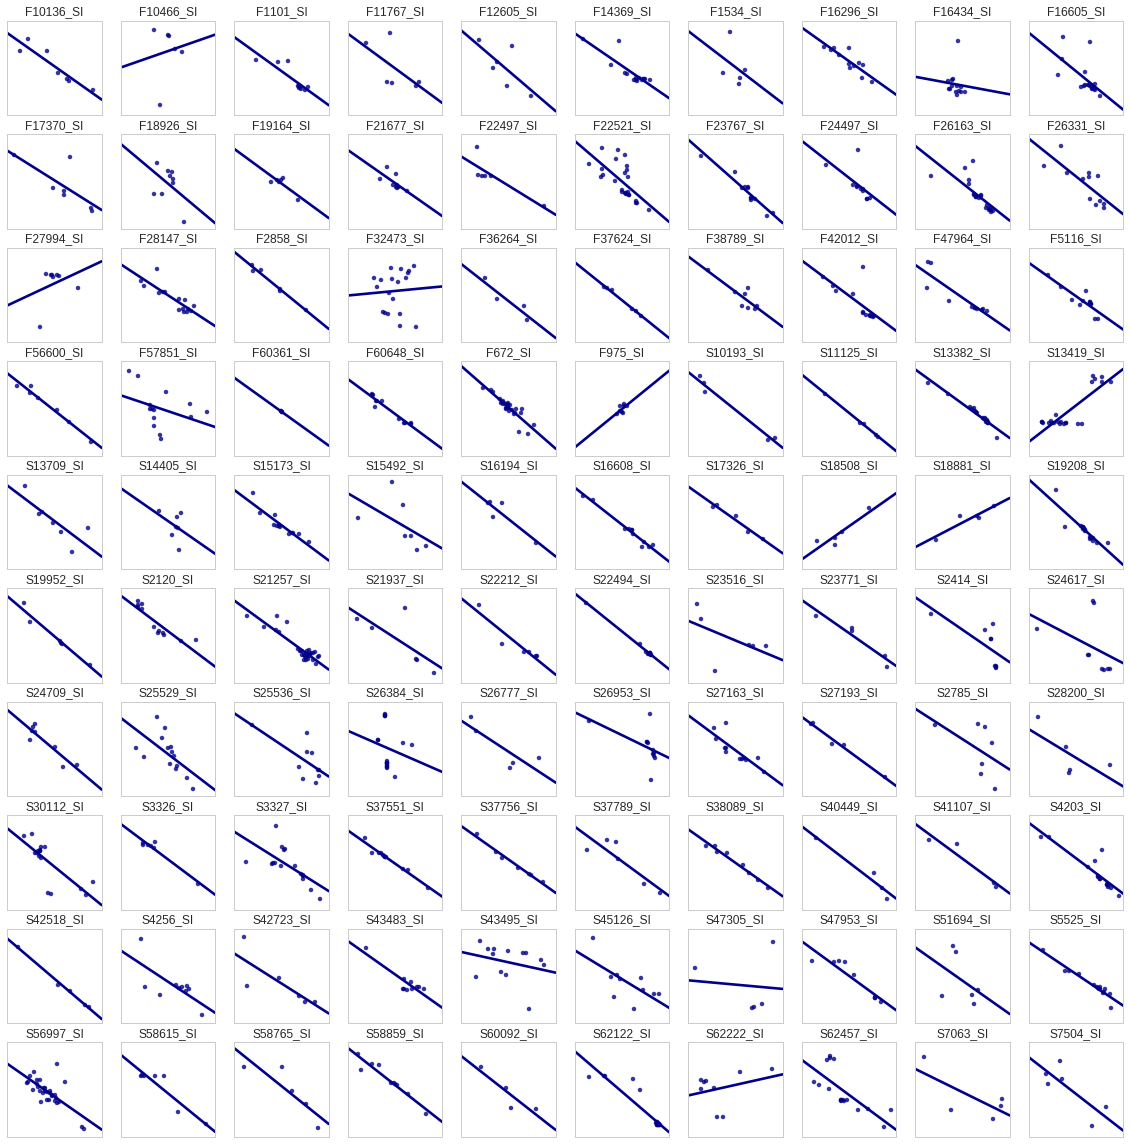

In [10]:
# Mated
groups = dat100[dat100['mating_status'] == 'M'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='c_i', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

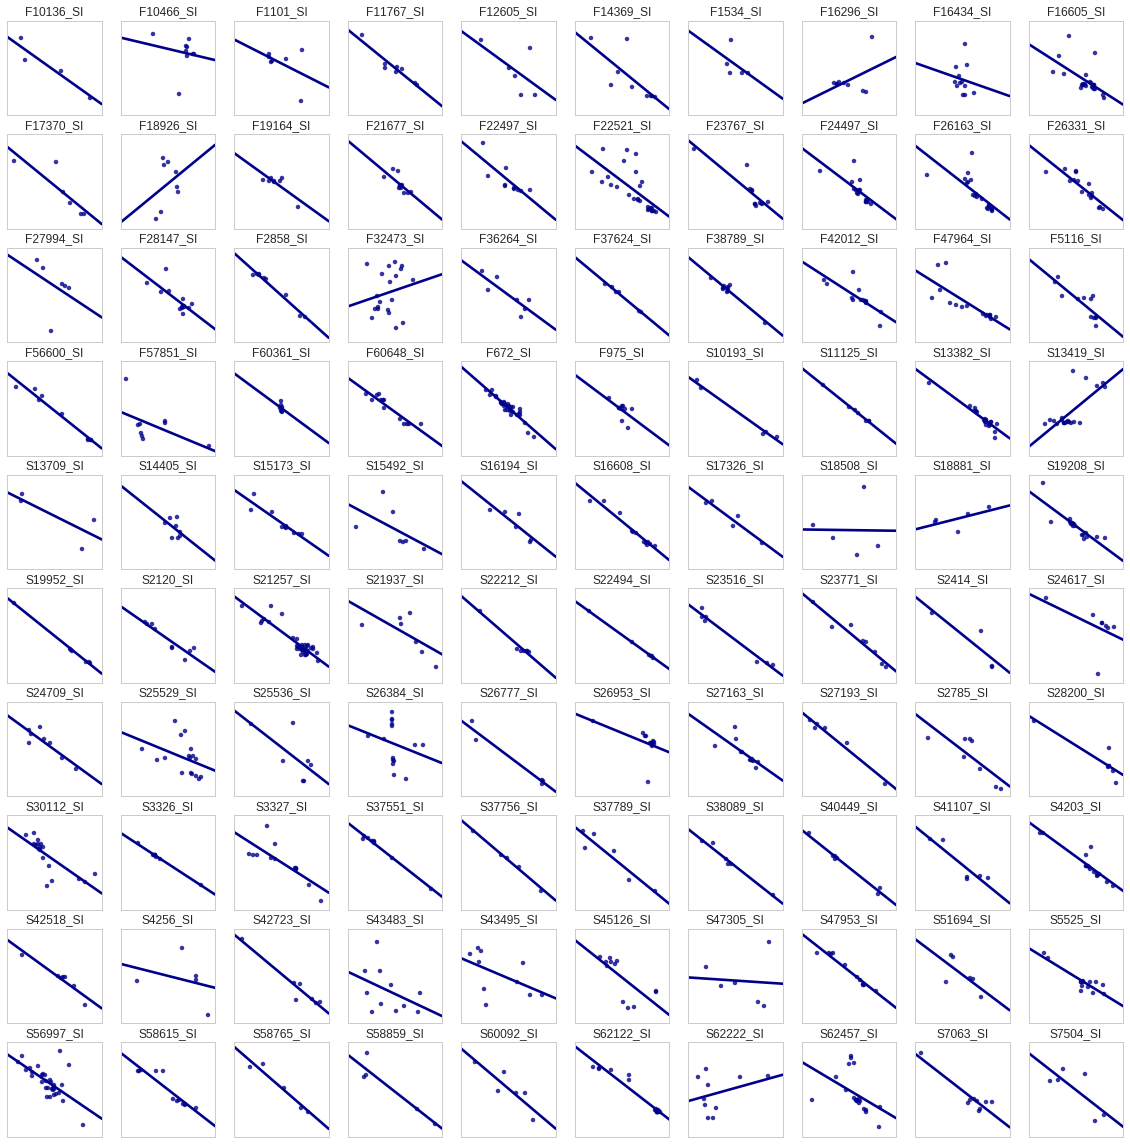

In [11]:
# Virgin
groups = dat100[dat100['mating_status'] == 'V'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='c_i', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## Method 1

$T_{t1} = 2(\frac{\sum E_t}{n} - \frac{\sum E_l}{n} - C_t)$

$T_{i1a} = 2(E_l - \frac{\sum E_l}{n} - C_i) - T_{t1}$

I have a few concerns with this method. I don't see the reasoning for using $\frac{\sum E_l}{n}$ as the allele mean. I am also concerned by the fact that $T_{t1}$ is always $\sim 0$

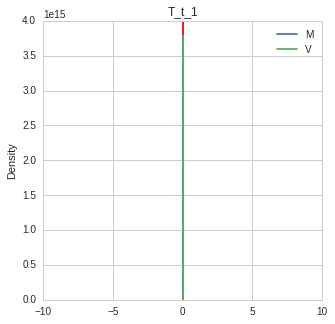

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
msKDE(dat, 'T_t_1', ax)

That being said, T_i_1a behaves as I would expect.

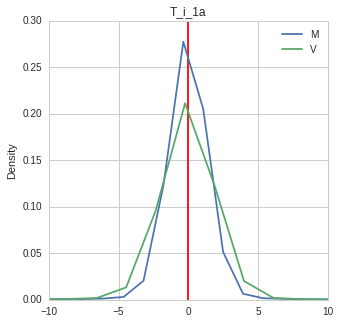

In [13]:
# Looking at all Data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
msKDE(dat, 'T_i_1a', ax)

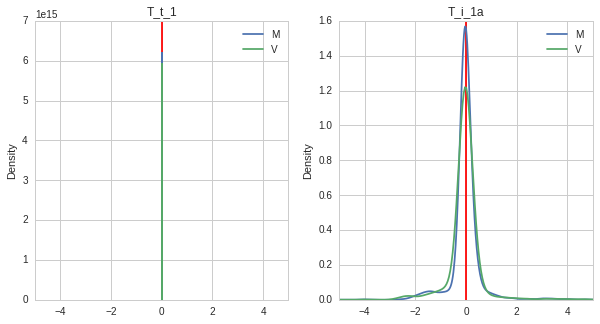

In [14]:
# Looking at 100 fusions only
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
msKDE(dat100, 'T_t_1', ax1, xlim=(-5, 5))
msKDE(dat100, 'T_i_1a', ax2, xlim=(-5, 5))

### Comparison of $\theta_{q5}$ vs T_i_1a

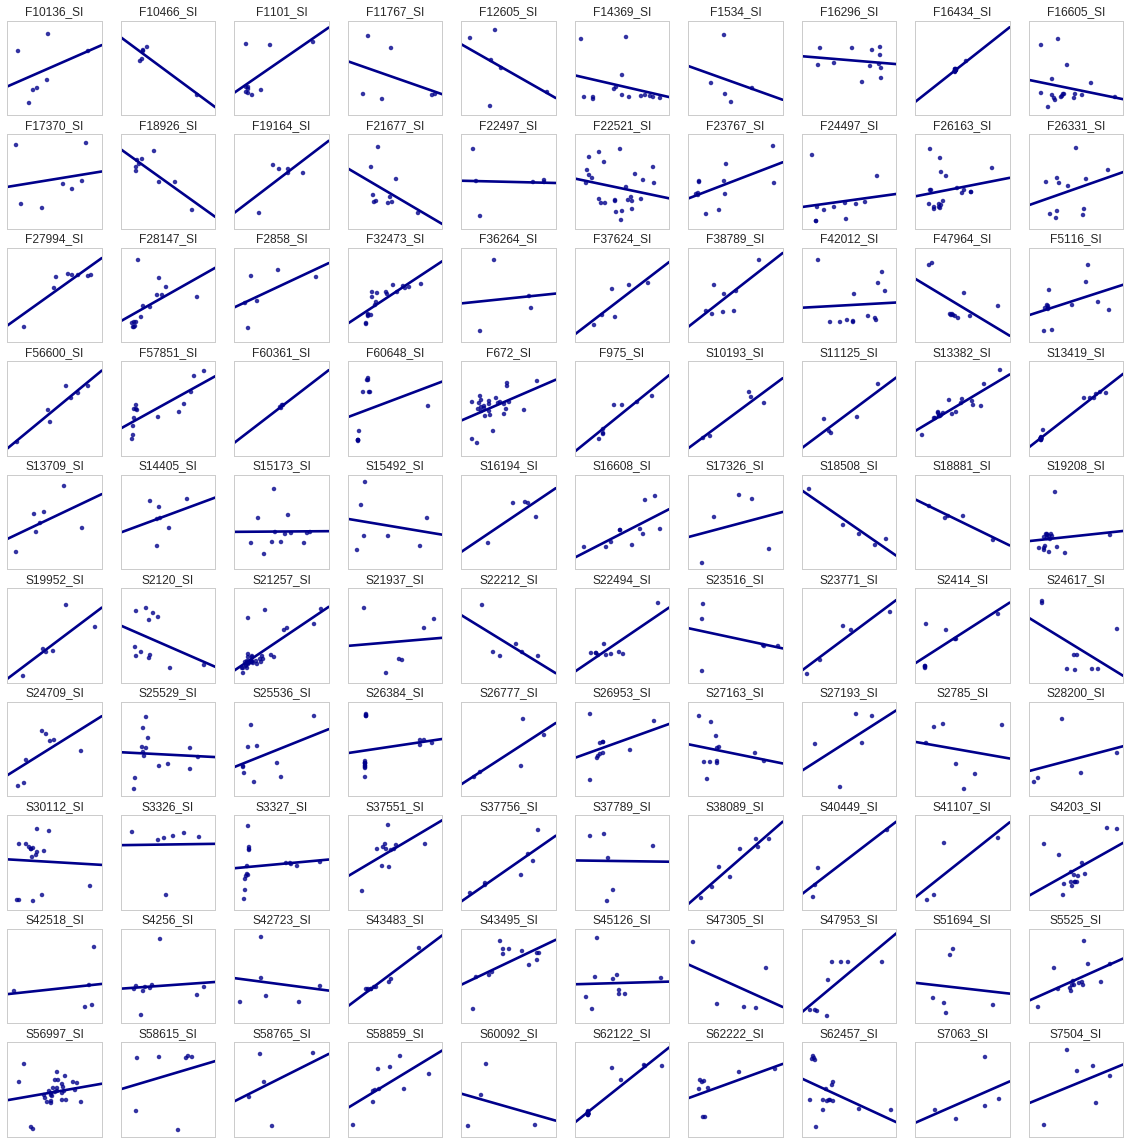

In [15]:
# Mated
groups = dat100[dat100['mating_status'] == 'M'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_1a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

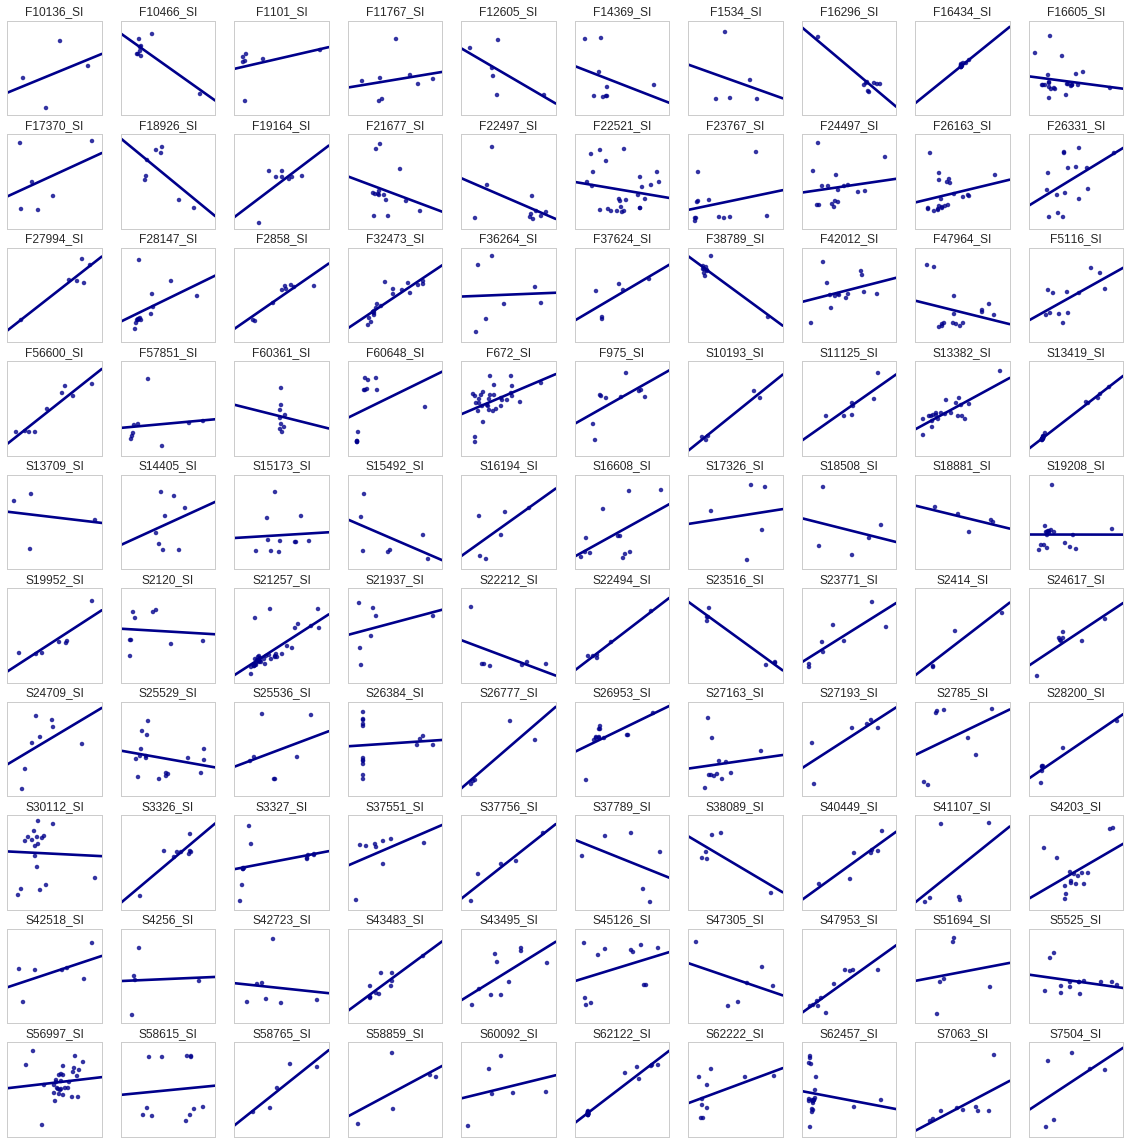

In [16]:
# Virgin
groups = dat100[dat100['mating_status'] == 'V'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_1a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## Method 2

$T_{t2} = 2(\frac{\sum E_t}{n} - C_t)$

$T_{i2a} = 2(E_l - C_i) - T_{t2}$

I like this method better because T_t_2 is not always 0. However, T_t_2 is never negative, which I find surprising.

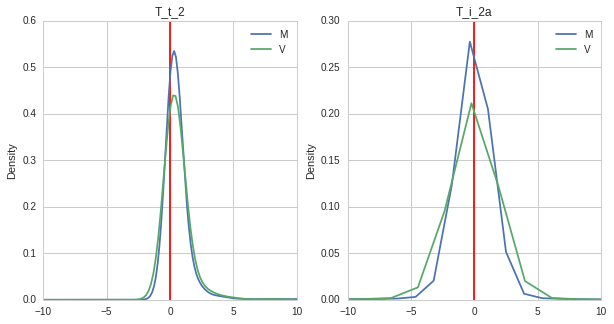

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
msKDE(dat, 'T_t_2', ax1)
msKDE(dat, 'T_i_2a', ax2)

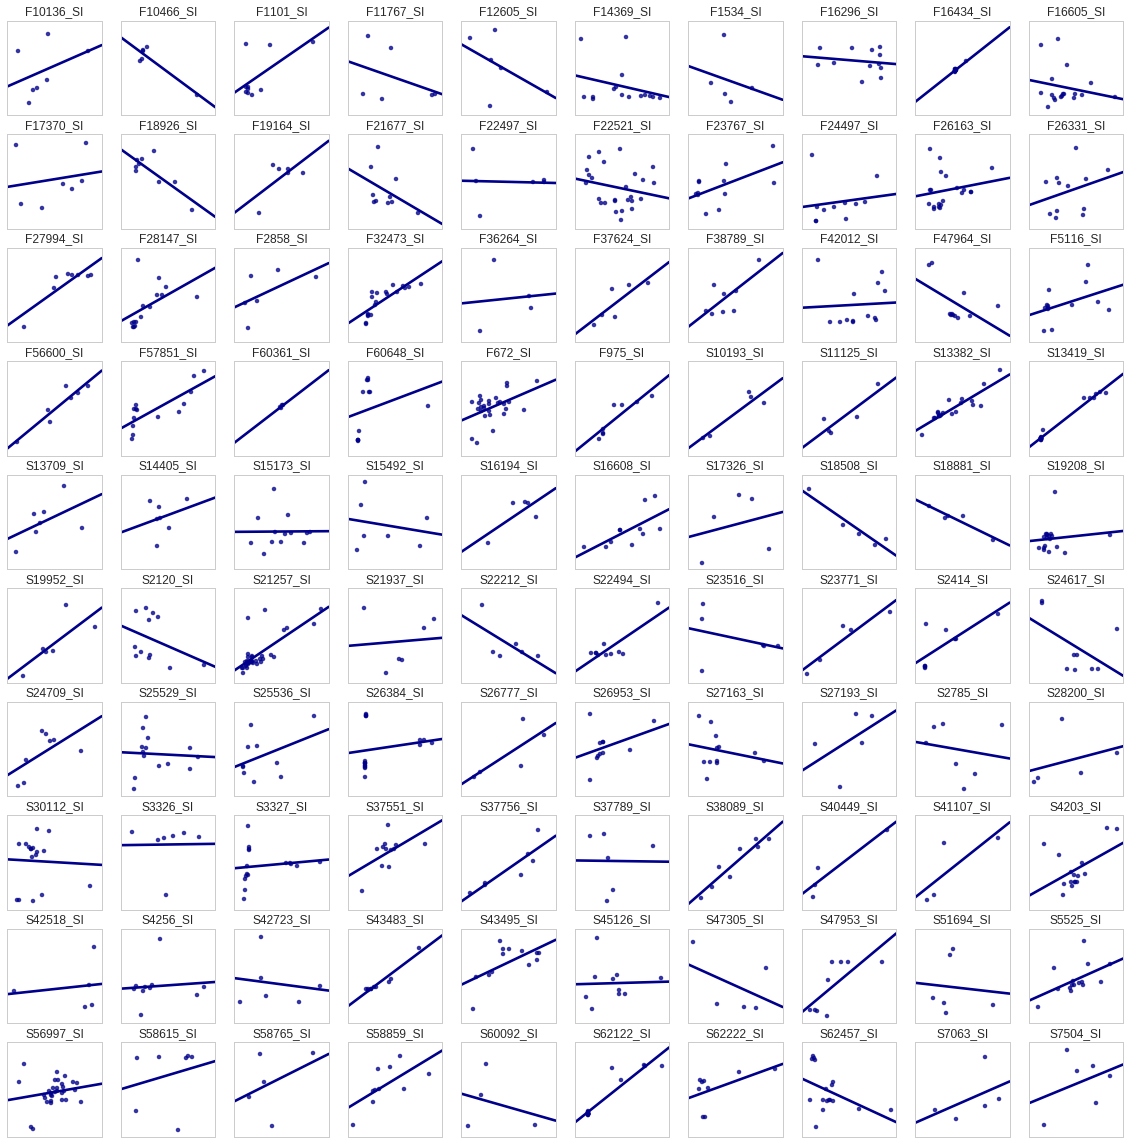

In [18]:
# Mated
groups = dat100[dat100['mating_status'] == 'M'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_2a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

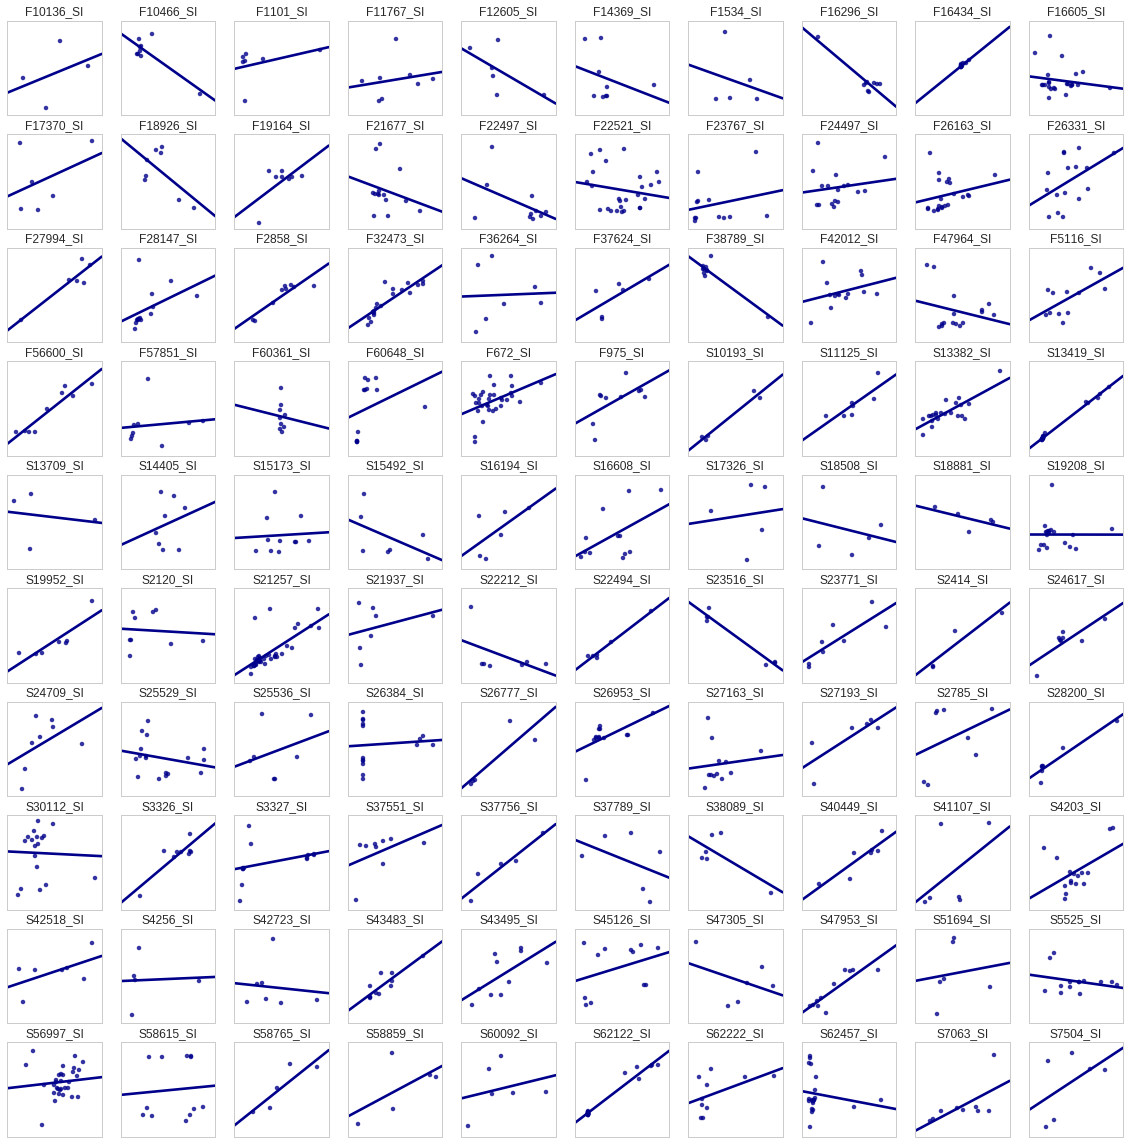

In [19]:
# Virgin
groups = dat100[dat100['mating_status'] == 'V'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_2a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## Method 3

$T_{t2} = 2(\frac{\sum E_t}{n} - C_t)$

$T_{i2a} = 2(E_l - 0.5 - C_i) - T_{t2}$

While using this method, T_t_3 has some negative values, it is not distributed around 0.

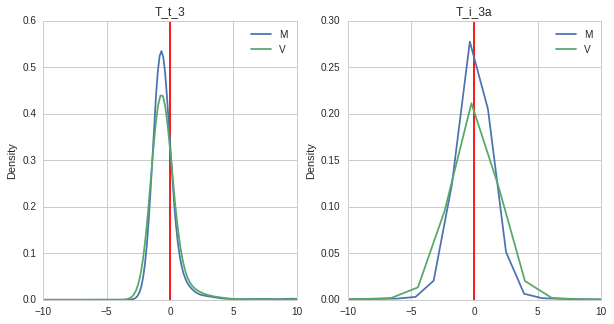

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
msKDE(dat, 'T_t_3', ax1)
msKDE(dat, 'T_i_3a', ax2)

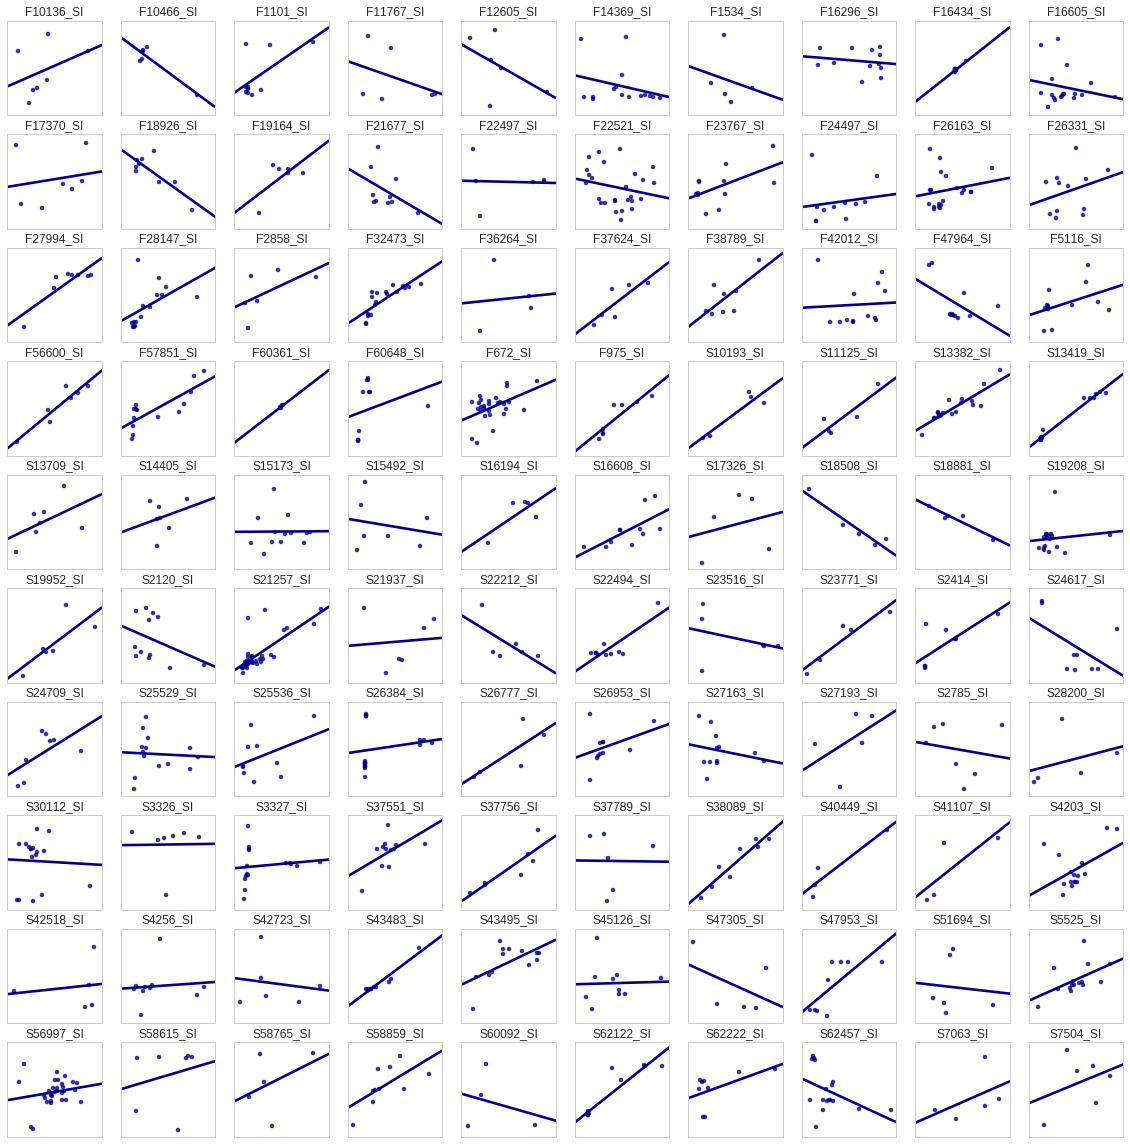

In [21]:
# Mated
groups = dat100[dat100['mating_status'] == 'M'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_3a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

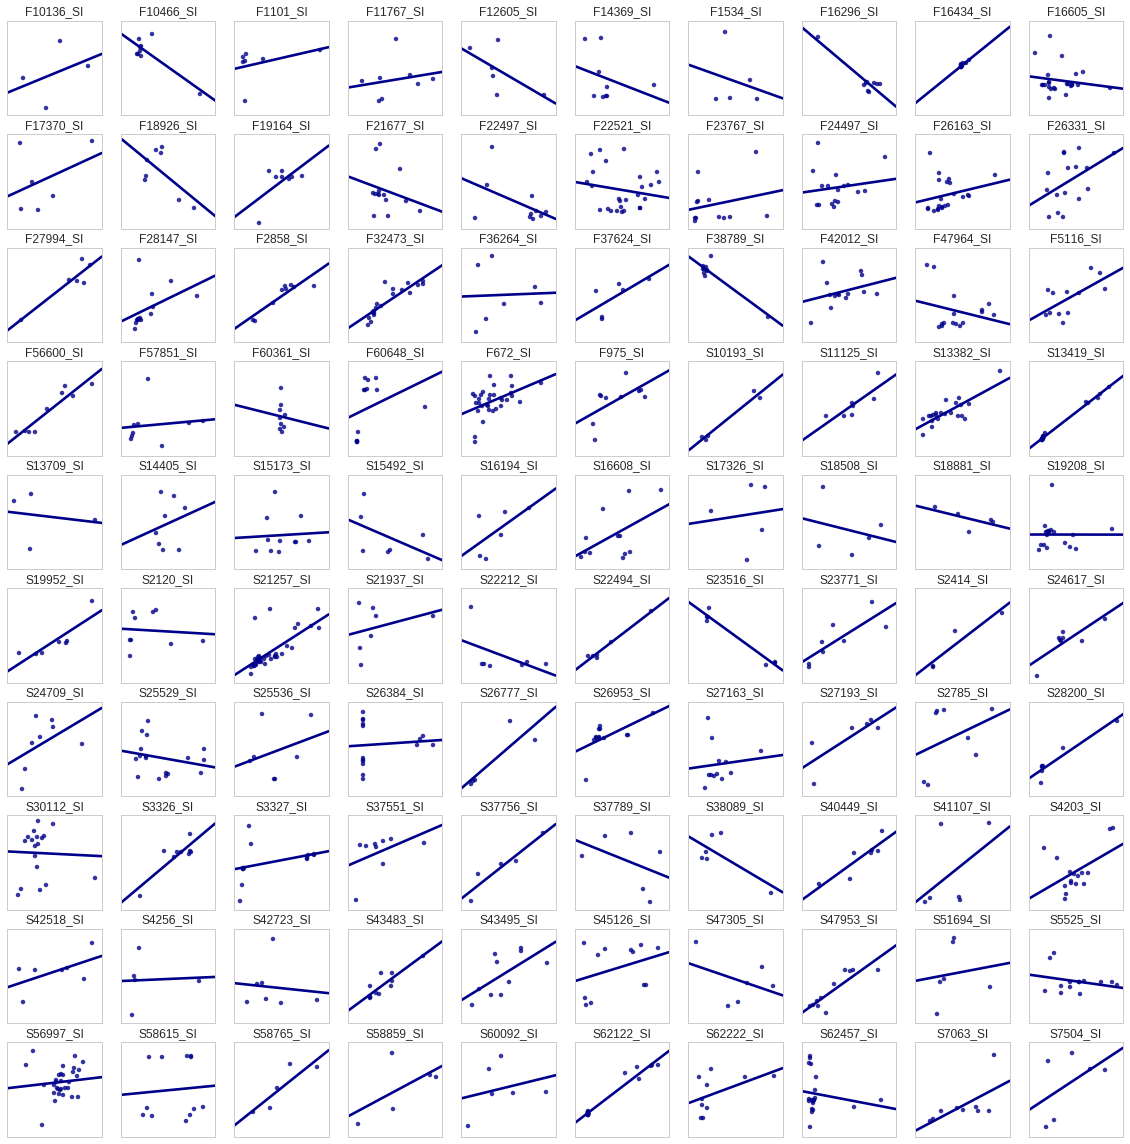

In [22]:
# Virgin
groups = dat100[dat100['mating_status'] == 'V'].groupby('fusion_id')

fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharey=False, sharex=False)
axes = np.ravel(axes)

for i, (fus, grp) in enumerate(groups):
    sns.regplot(x='T_i_3a', y='q5_mean_theta', data=grp, ax=axes[i], color='DarkBlue', ci=None)
    axes[i].set_title(fus)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)